# Zomato Data Analysis Project

# Step 1 : Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 : Create DataFrame

In [4]:
dataframe = pd.read_csv("Zomato data .csv")

In [5]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# convert the datatype of column- rate

In [6]:
def handleRate(value):
    value = str(value).split('/')
    value = value [0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# 1. What type of restaurant do the majority of customers order from?

In [7]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

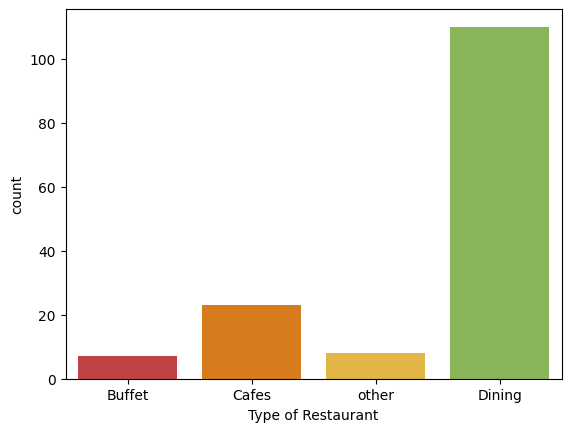

In [9]:
colors = ['#D32F2F', '#F57C00', '#FBC02D', '#8BC34A']
sns.countplot(x=dataframe['listed_in(type)'], hue=dataframe['listed_in(type)'], palette=colors)
plt.xlabel("Type of Restaurant")

# Conclusion: majority of the restaurant falls in dinning category.

# 2. How many votes has each type of restaurant received from customer?

Text(0, 0.5, 'Votes')

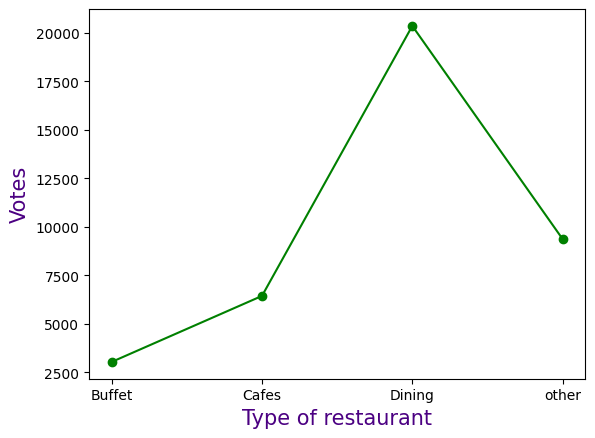

In [25]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker= "o")
plt.xlabel("Type of restaurant", c= "indigo", size = 15)
plt.ylabel("Votes", c= "indigo", size = 15)

# Conclusion: Dinning restaurants has received maximum votes

# 3. What are the ratings that the majority of restaurants have received?

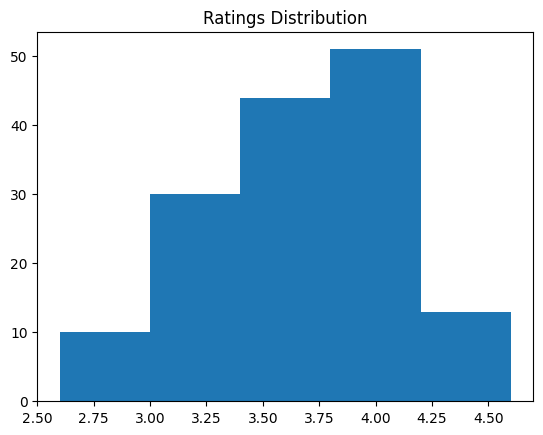

In [33]:
plt.hist(dataframe['rate'], bins = 5)
plt.title("Ratings Distribution")
plt.show()

# Conclusion: The majority restaurants received ratings from 3.5 to 4.

# 4. What is average spending on each order by couples?


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

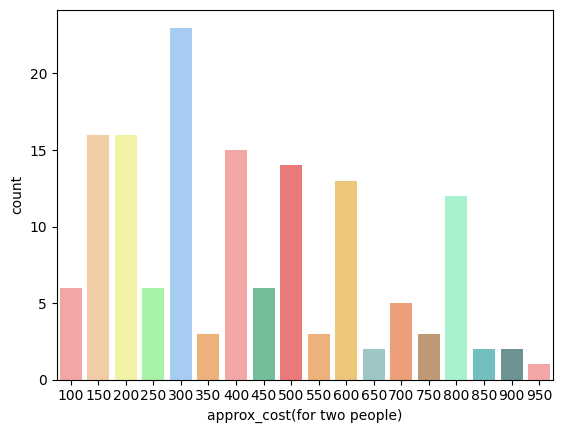

In [35]:
couple_data = dataframe['approx_cost(for two people)']
colors = [
    '#FF9999', '#FFCC99', '#FFFF99', '#99FF99', '#99CCFF', '#FFB266', '#FF9999', '#66CC99',
    '#FF6666', '#FFB266', '#FFCC66', '#99CCCC', '#FF9966', '#CC9966', '#99FFCC', '#66CCCC',
    '#669999', '#FF9999'
]
sns.countplot(x=couple_data, hue=couple_data, palette=colors, legend=False)

# Conclusion: The majority of couples prefer restaurants with an approximate cost of Rs 300. 

# 5. Which mode (online or offline) has received maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

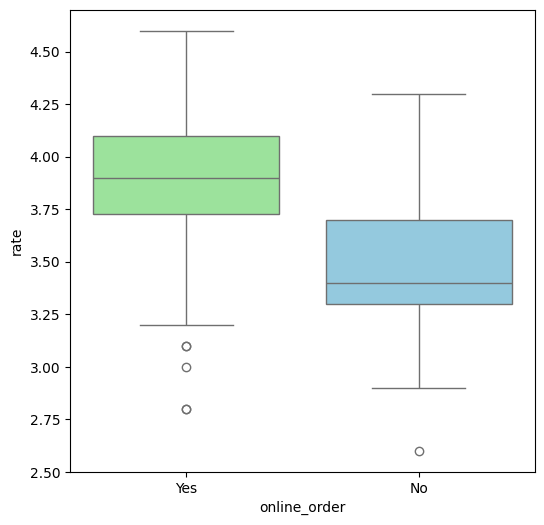

In [45]:
plt.figure(figsize= (6,6))
colors = ['lightgreen', 'skyblue']
sns.boxplot(x='online_order', y='rate', data=dataframe, hue='online_order', palette=colors, legend=False)

# Conclusion: Offline order received lower rating as compared to online order.

# 6. Which type of restaurant received more offline orders, so that zomato can provide customers with good offers?

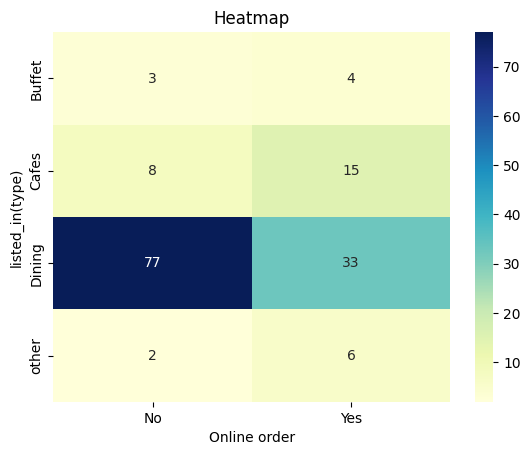

In [47]:
pivot_table = dataframe.pivot_table(index= 'listed_in(type)', columns = 'online_order', aggfunc= 'size', fill_value=0)
sns.heatmap(pivot_table, annot= True, cmap= "YlGnBu", fmt= 'd')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("listed_in(type)")
plt.show()

# Conclusion: Dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that client prefers to place orders in person at restaurants, but prefer online ordering at cafes.